In [808]:
import pandas as pd


In [809]:
wine_df=pd.read_csv('wine_cleared.csv')

In [810]:
wine_df.head(1)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia


РАЗБОР ЧИСЛОВЫХ ВЕЛИЧИН

В наборе данных очень часто встречаются числовые величины. Это могут быть вес, рост, расстояние и так далее. Вы можете преобразовывать их, создавать новые признаки, которые могут оказаться лучше исходных.

Например, в датасете винных обзоров числовым признаком является цена за бутылку вина. Вы можете округлить цену 35.363389$ в 35$, избавив данные от лишней информации.

✍️ Создадим новый признак price_round, означающий округлённую до целого числа цену за бутылку вина:



In [811]:
wine_df['price_round']=wine_df['price'].round().astype(int)
wine_df

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),28
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,75
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,30
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,32


РАЗБОР ТЕКСТА

Текстовые признаки могут содержать в себе большое количество информации. Например, если бы наша модель умела распознавать текст, то из описания вина мы бы могли понять, какими словами сомелье чаще характеризуют качественное вино. Вы можете воспользоваться методами извлечения слов из текста, чтобы получить новые признаки.

В названии вина вы можете заметить указание года произведения вина. Чтобы узнать, влияет ли год на рейтинг вина, вам необходимо выделить год в отдельный признак.

Для того, чтобы извлечь из строки число, обозначающее год, необходимо воспользоваться регулярными выражениями.

Регулярные выражения (regexp, или regex) — это механизм для поиска и замены текста. Это шаблоны, которые используются для поиска соответствующей части текста.

Например, с помощью такого регулярного выражения [^@ \t\r\n]+@[^@ \t\r\n]+\.[^@ \t\r\n]+ можно найти любой email в тексте.



In [812]:
regex = '\d{4}' # регулярное выражение поиска чисел, 4 - поиск 4-ныч чисел. 
wine_df['year'] = wine_df['title'].str.findall(regex).str.get(0)

wine_df.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013


РАЗБОР КАТЕГОРИЙ

В наборе данных винных обзоров самая популярная страна-производитель вина — США. Возможно, это не случайность, и факт производства в США влияет на рейтинг вина. Выделим этот факт.

Вы можете создать новый бинарный признак is_usa и присвоить ему 1 в случае, если вино произведено в США, иначе — 0.

data['is_usa'] = data['country'].apply(lambda x: 1 if x == 'US' else 0)
В наборе данных также есть ещё две страны, которые являются не менее популярными производителями вина.

In [813]:
wine_df['is_usa'] = wine_df['country'].apply(lambda x: 1 if x == 'US' else 0)
wine_df.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013,0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013,1


In [814]:
# список стран производителей вин, в порядке убывания популярности
wine_df['country'].value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

In [815]:
# создадим бинарные признаки is_france, is_italy наподобие признака is_usa.
wine_df['is_france'] = wine_df['country'].apply(lambda x: 1 if x== 'France' else 0)
wine_df['is_italy'] = wine_df['country'].apply(lambda x: 1 if x== 'Italy' else 0)
wine_df['is_spain'] = wine_df['country'].apply(lambda x: 1 if x== 'Spain' else 0)


In [816]:
wine_df['is_france'].sum()

22093

In [817]:
wine_df['is_italy'].sum()

19540

In [818]:
wine_df['year']

0         2013
1         2011
2         2013
3         2013
4         2012
          ... 
129966    2013
129967    2004
129968    2013
129969    2012
129970    2012
Name: year, Length: 129971, dtype: object

In [819]:
# Создадим новый бинарный признак old_wine, где значение 1 будет обозначать, что вино старше 2010 года.
wine_df['year'] = wine_df['year'].fillna(0)
wine_df['year'] = wine_df['year'].astype(int)
wine_df['old_wine'] = wine_df['year'].apply(lambda x: 1 if x <= 2010 else 0)
wine_df['old_wine'].sum()

56539

преобразуем признак year в объект datetime для удобного сравнения дат

data['year'] = pd.to_datetime(data['year'], errors='coerce')

для сравнения используем год, заполняем значения признака old_wine, где год вина меньше 2010

data['old_wine'] = data['year'].apply(lambda x: 1 if x.year < 2010 else 0) 

data['old_wine'].sum()

In [820]:
wine_df['title']

0                         Nicosia 2013 Vulkà Bianco  (Etna)
1             Quinta dos Avidagos 2011 Avidagos Red (Douro)
2             Rainstorm 2013 Pinot Gris (Willamette Valley)
3         St. Julian 2013 Reserve Late Harvest Riesling ...
4         Sweet Cheeks 2012 Vintner's Reserve Wild Child...
                                ...                        
129966    Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...
129967                    Citation 2004 Pinot Noir (Oregon)
129968    Domaine Gresser 2013 Kritt Gewurztraminer (Als...
129969        Domaine Marcel Deiss 2012 Pinot Gris (Alsace)
129970    Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...
Name: title, Length: 129971, dtype: object

In [821]:
#province = '\((.*?)\)'
province = '\((.*?)\)'
wine_df['title'].str.findall(province).str.get(0)

0                           Etna
1                          Douro
2              Willamette Valley
3            Lake Michigan Shore
4              Willamette Valley
                   ...          
129966    Erben Müller-Burggraef
129967                    Oregon
129968                    Alsace
129969                    Alsace
129970                    Alsace
Name: title, Length: 129971, dtype: object

In [822]:
#regex = '\((.*?)\)'
#data['locality'] = data['title'].str.findall(regex).str.get(0)

In [823]:
population_df = pd.read_csv('country_population.csv', sep=';')

In [824]:
population_df[population_df['country'] == 'Italy']

,country,population
24,Italy,"59,097,904"


Далее сопоставим значения из датасета country_population и страной-производителем вина. На основе значений населения из country_population заполним новый признак country_population.

Используем для этого функцию для объединения датасетов join. Для объединения используем аргумент on='country', указывая столбец, по которому объединяем датафреймы:

data.join(country_population.set_index('country'), on='country')

In [825]:
wine_df = wine_df.join(population_df.set_index('country'), on = 'country')

In [826]:
wine_df

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,variety,winery,price_round,year,is_usa,is_france,is_italy,is_spain,old_wine,population
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,White Blend,Nicosia,35,2013,0,0,1,0,0,"59,097,904"
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,Portuguese Red,Quinta dos Avidagos,15,2011,0,0,0,0,0,"10,347,892"
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Pinot Gris,Rainstorm,14,2013,1,0,0,0,0,"333,022,386"
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,Riesling,St. Julian,13,2013,1,0,0,0,0,"333,022,386"
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Pinot Noir,Sweet Cheeks,65,2012,1,0,0,0,0,"333,022,386"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),28,2013,0,0,0,0,0,"83,129,285"
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,...,Pinot Noir,Citation,75,2004,1,0,0,0,1,"333,022,386"
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,...,Gewürztraminer,Domaine Gresser,30,2013,0,1,0,0,0,"68,035,000"
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,...,Pinot Gris,Domaine Marcel Deiss,32,2012,0,1,0,0,0,"68,035,000"


In [827]:
country_are_df = pd.read_csv('country_area.csv', sep=';')

In [828]:
country_are_df

,country,area
0,Russia,17075400.00
1,Canada,9984670.00
2,China,9596960.00
3,US,9372610.00
4,Brazil,8547000.00
...,...,...
188,San Marino,61.00
189,Tuvalu,26.00
190,Nauru,21.00
191,Monaco,2.00


In [829]:
wine_df

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,variety,winery,price_round,year,is_usa,is_france,is_italy,is_spain,old_wine,population
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,White Blend,Nicosia,35,2013,0,0,1,0,0,"59,097,904"
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,Portuguese Red,Quinta dos Avidagos,15,2011,0,0,0,0,0,"10,347,892"
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Pinot Gris,Rainstorm,14,2013,1,0,0,0,0,"333,022,386"
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,Riesling,St. Julian,13,2013,1,0,0,0,0,"333,022,386"
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Pinot Noir,Sweet Cheeks,65,2012,1,0,0,0,0,"333,022,386"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),28,2013,0,0,0,0,0,"83,129,285"
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,...,Pinot Noir,Citation,75,2004,1,0,0,0,1,"333,022,386"
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,...,Gewürztraminer,Domaine Gresser,30,2013,0,1,0,0,0,"68,035,000"
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,...,Pinot Gris,Domaine Marcel Deiss,32,2012,0,1,0,0,0,"68,035,000"


In [830]:
wine_df = wine_df.join(country_are_df.set_index('country'), on = 'country')





In [831]:
wine_df

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,winery,price_round,year,is_usa,is_france,is_italy,is_spain,old_wine,population,area
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,Nicosia,35,2013,0,0,1,0,0,"59,097,904",301230.0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,Quinta dos Avidagos,15,2011,0,0,0,0,0,"10,347,892",92391.0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Rainstorm,14,2013,1,0,0,0,0,"333,022,386",9372610.0
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,St. Julian,13,2013,1,0,0,0,0,"333,022,386",9372610.0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Sweet Cheeks,65,2012,1,0,0,0,0,"333,022,386",9372610.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,...,Dr. H. Thanisch (Erben Müller-Burggraef),28,2013,0,0,0,0,0,"83,129,285",357022.0
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,...,Citation,75,2004,1,0,0,0,1,"333,022,386",9372610.0
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,...,Domaine Gresser,30,2013,0,1,0,0,0,"68,035,000",547030.0
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,...,Domaine Marcel Deiss,32,2012,0,1,0,0,0,"68,035,000",547030.0


Какая площадь страны у вина под названием 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))'? Ответ вводите без пробелов, округлите до целых.

In [832]:
wine = wine_df[(wine_df['title'] == 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))')]
int(wine['area'])

9372610

#### Создание признаков. Работа с форматом «дата-время»


✍️ Давайте теперь приступим к практическим заданиям. В следующих заданиях мы будем использовать срез базы данных из колл-центра. Компания хочет предсказывать, какому из клиентов стоит звонить сегодня, а какому — нет.

Давайте рассмотрим, из каких признаков состоит срез данных:

- client_id — идентификатор клиента в базе;
- agent_date — время соединения с агентом;
- created_at — время соединения с клиентом (начало разговора);
- end_date — время окончания соединения с клиентом (конец разговора).
Прочитаем данные:

In [833]:
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns = ['client_id',  'agent_date', 'created_at' ,'end_date'])

# преобразовываем признаки в формат datetime для удобной работы

calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])

calls

,client_id,agent_date,created_at,end_date
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32


In [834]:
# создадим признак времени разговора с клиентом в секундах
calls['duration'] = (calls['end_date'] - calls['created_at']).dt.seconds
calls

,client_id,agent_date,created_at,end_date,duration
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6


In [835]:
# создадим признак дозвона клиентам
calls['time_connection'] = (calls['created_at'] - calls['agent_date']).dt.seconds
calls['time_connection'].sum()

89

Создайте новый признак is_connection — факт соединения с клиентом. Признак будет равен 1 в случае, если разговор состоялся и продлился больше 10 секунд, иначе — 0.

В ответ запишите результат выполнения следующего кода: calls['is_connection'].sum()

In [836]:
calls['is_connection'] = calls['duration'].apply(lambda x: 1 if x>10 else 0)
calls['is_connection'].sum()

7

Создайте признак time_diff — разницу в секундах между началом звонка(не разговора) и его окончанием.

В ответ запишите результат выполнения следующего кода: calls['time_diff'].sum()

In [837]:
calls['time_diff'] = (calls['end_date'] - calls['agent_date']).dt.seconds
calls['time_diff'].sum()

1144

Итак, мы получили четыре новых признака для нашего набора данных: duration, time_connection, is_connection, time_diff. После генерации признаков из дат исходные признаки agent_date, created_at, end_date нам больше не нужны — передать на вход модели мы им не сможем, так как большинство моделей машинного обучения умеют работать только с числами, даты и текст ей недоступны, поэтому удалим их:

In [838]:
calls = calls.drop(columns= ['agent_date', "created_at"	,"end_date"], axis = 1)


In [839]:
calls

,client_id,duration,time_connection,is_connection,time_diff
0,460,1,5,0,6
1,12,231,2,1,233
2,56,104,0,1,104
3,980,2,7,0,9
4,396,215,1,1,216
5,449,95,5,1,100
6,397,92,2,1,94
7,398,215,0,1,215
8,452,94,1,1,95
9,440,6,66,0,72


Итоговый набор данных включает в себя колонки client_id, duration, time_connection, is_connection, time_diff. После генерации признаков специалисты по машинному обучению проводят отбор признаков. Этому вы научитесь далее в юните про отбор признаков.

Таким образом, мы получили набор данных с признаками, которые можно подать на вход модели, и не потеряли важную информацию о событиях, произошедших в даты набора данных. 

Создайте признак количество дней с момента произведения вина — years_diff для датасета винных обзоров. За дату отсчёта возьмите 12 января 2022 года. В ответ впишите максимальное количество дней с момента произведения вина. Ответ округлите до целого числа.

При попытке преобразовать созданный ранее столбец year в формат datetime, вы получите ошибку OutOfBoundsDatetime, которая возникает из-за некорректного ожидаемого формата входных данных. Чтобы справиться с этой ошибкой, воспользуйтесь параметром errors в функции to_datetime библиотеки Pandas. Параметр нужно установить в значение coerce:
data['year'] = pd.to_datetime(data['year'], errors = 'coerce')
Подробнее о назначении этого параметра вы можете прочесть в документации.

In [840]:
wine_df['year'] = pd.to_datetime(wine_df['year'], errors= 'coerce')



In [841]:
wine_df['year_diff'] = ((pd.to_datetime('2022-01-12')) - wine_df['year']).dt.days
wine_df['year_diff'].max()

19004

#### Кодирование признаков. Методы

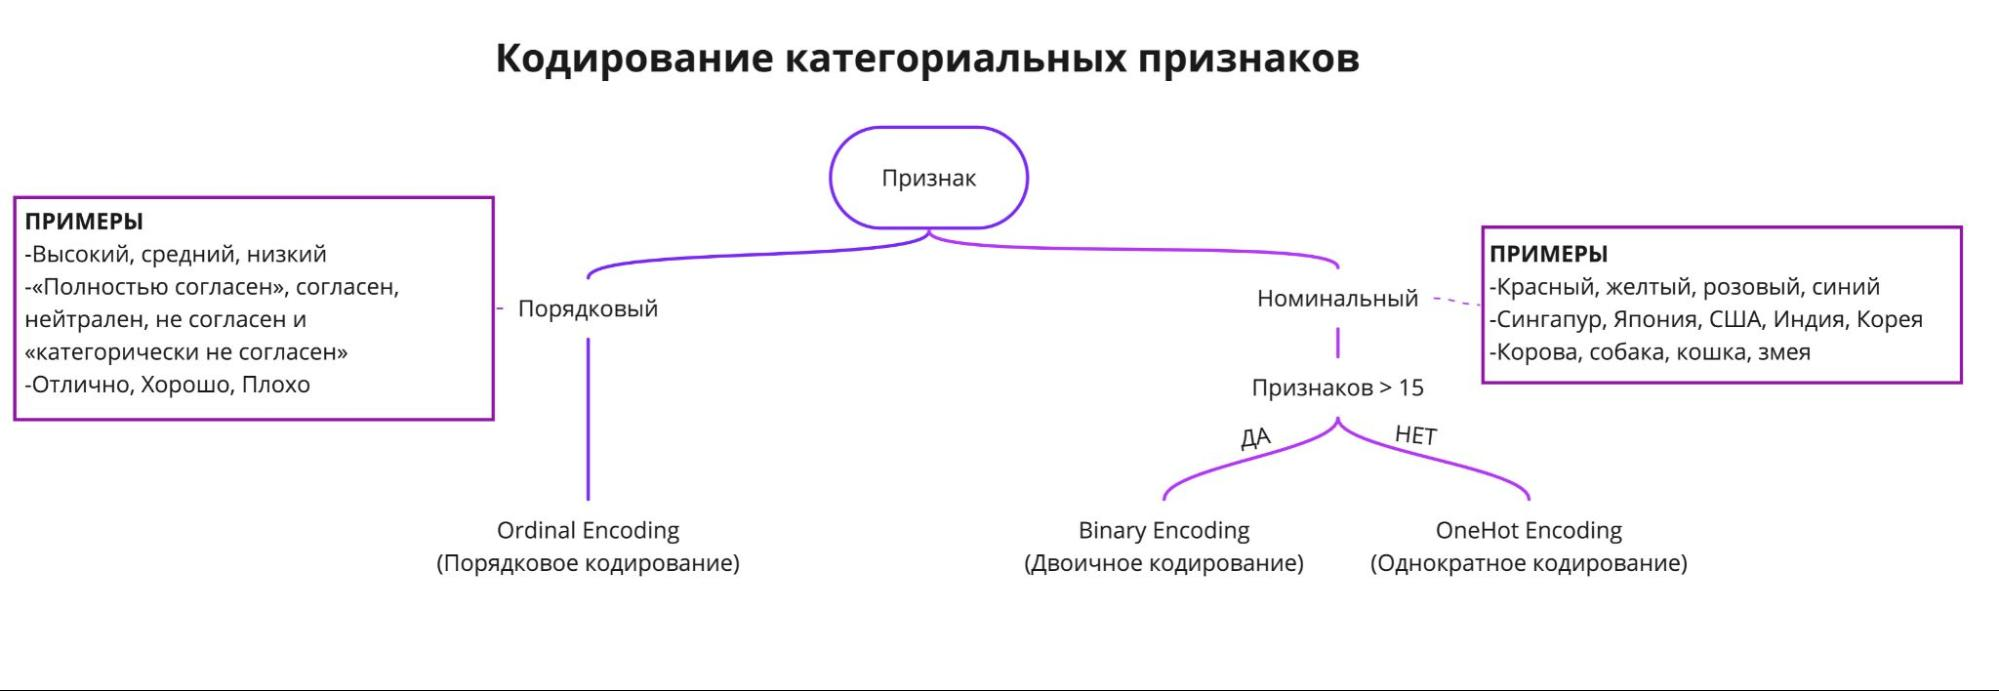

Эта схема предназначена только для категориальных признаков.

Если признак, который вы собираетесь кодировать, порядковый, используйте порядковое кодирование (Ordinal Encoding). 

Для номинальных признаков важно количество уникальных значений признака, так как при их большом количестве могут возникать проблемы с памятью. Если у признака меньше 15 значений, следует выбирать для данных однократное кодирование (OneHot Encoding). Число 15 выбрано эмпирически — для вашего набора данных это число может быть 20 или 10. Это зависит от количества признаков в вашем датасете, количестве строк и многих других факторов. Если признаков немного, то вы также можете воспользоваться однократным кодированием. В других ситуациях вам стоит выбрать другой способ кодирования, например бинарный (Binary Encoding).

Ниже мы рассмотрим методы кодирования, обозначенные в блок-схеме. Для кодирования категориальных признаков мы будем использовать библиотеку category_encoders. Это удобная библиотека для кодирования категориальных переменных различными методами.

Установим библиотеку:

pip install category_encoders
Импортируем библиотеку category-encoders для дальнейшего использования. 

import category_encoders as ce
Рассмотрим следующие популярные способы кодирования: 

- порядковое кодирование (Ordinal Encoding); 
- однократное кодирование (OneHot Encoding); 
- бинарное кодирование (Binary Encoding).

In [842]:
# инициализируем информацию об одежде
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

,size,type
0,xxs,dress
1,xxs,skirt
2,xs,dress
3,s,skirt
4,m,dress
5,l,shirt
6,s,coat
7,m,coat
8,xxl,shirt
9,l,dress


ПОРЯДКОВОЕ КОДИРОВАНИЕ. ORDINAL ENCODING

В порядковой кодировке признаков каждому строковому значению присваивается значение в виде целого числа, свойственного для конкретного значения строки.

Результат кодирования порядкового признака size будет выглядеть так: каждому строковому значению присваивается значение в виде целого числа.

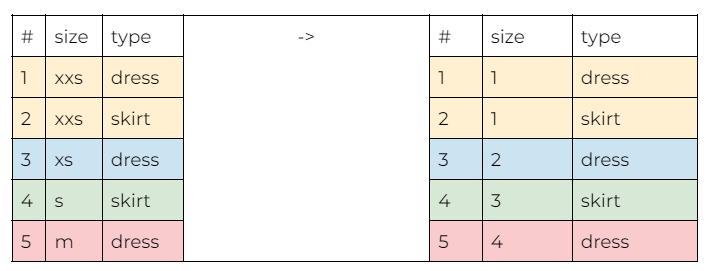


Выполним теперь кодирование порядкового признака size в Python. Порядковое кодирование в библиотеке реализовано в классе OrdinalEncoder. По умолчанию все строковые столбцы будут закодированы.

Метод fit_transform устанавливает соответствия для кодирования и преобразовывает данные в соответствие с ними. Затем используем метод concat() для добавления закодированного признака в датафрейм data.

In [843]:
import category_encoders as ce # импортируем библиотеку для работы с кодировщиками

Закодируем признак year в датасете винных обзоров порядковым кодированием

In [844]:
order_encoder = ce.OrdinalEncoder()
data_bin = order_encoder.fit_transform(wine_df['year'])
wine_df = pd.concat([wine_df, data_bin], axis= 1)


ОДНОКРАТНОЕ КОДИРОВАНИЕ. ONE-HOT ENCODING

Однократное кодирование (его ещё часто называют «горячим») является автоматизированным кодированием, которое мы делали в юните Создание признаков. Для каждой новой категории создается новый бинарный признак. Значение 1 в этих признаках проставляется там, где значение исходного признака равно этой категории. 

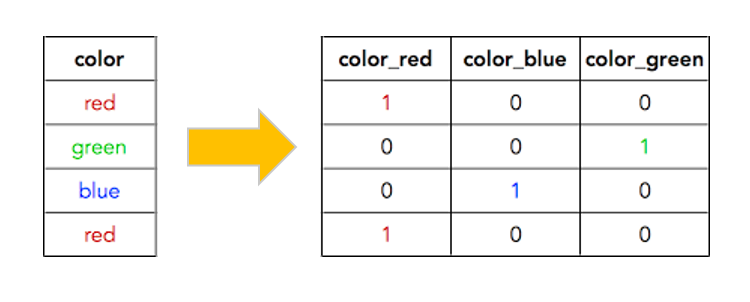

Кодирование колонки color

На рисунке изображено кодирование колонки color со значениями red, green, blue. Для каждого значения создаётся новый бинарный признак: red -> color_red, blue -> color_blue, green -> color_green, и проставляются значения исходного признака. 

Этот способ кодирования понятен, хорошо работает как на номинальных, так и на порядковых признаках. Однако существует один минус: количество созданных признаков равно количеству уникальных значений категориального признака. 

В нашем примере с признаком color мы получили три новых признака color_red color_blue, color_green. Но представьте, что в наборе данных у нас попадётся признак с большим количеством категорий.

Закодируем признак type в Python. Используем класс OneHotEncoding библиотеки category_encoders. Укажем в cols наименование признака type для кодировки, иначе будут закодированы все строковые столбцы.

import category_encoders as ce # импорт для работы с кодировщиком

encoder = ce.OneHotEncoder(cols=['type'], use_cat_names=True) # указываем столбец для кодирования

type_bin = encoder.fit_transform(clothing['type'])

clothing = pd.concat([clothing, type_bin], axis=1)

clothing

На самом деле метод однократного кодирования реализован в pandas в функции pd.get_dummies(). Для выполнения кодирования достаточно передать в функцию DataFrame и указать столбцы, для которых должно выполняться кодирование. По умолчанию кодирование выполняется для всех столбцов типа object:

clothing_dummies = pd.get_dummies(clothing, columns=['type'])
Новые бинарные признаки также часто называются dummy-признаками или dummy-переменными.  

В нашем наборе данных винных обзоров признак, обозначающий имя сомелье (taster_name), является номинальным. Закодируем его, используя One-Hot Encoding.

В ответе напишите, сколько признаков добавилось после применения кодирования

In [845]:


encoder = ce.OneHotEncoder(cols=['taster_name'], use_cat_names=True)
taster_col = encoder.fit_transform(wine_df['taster_name'])
wine_df = pd.concat([wine_df, taster_col], axis=1)
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129972 entries, 0 to 129970
Data columns (total 44 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unnamed: 0                      129972 non-null  int64         
 1   country                         129909 non-null  object        
 2   description                     129972 non-null  object        
 3   designation                     129972 non-null  object        
 4   points                          129972 non-null  int64         
 5   price                           129972 non-null  float64       
 6   province                        129909 non-null  object        
 7   region_1                        129972 non-null  object        
 8   taster_name                     129972 non-null  object        
 9   taster_twitter_handle           129972 non-null  object        
 10  title                           129972 non-null  object 

ДВОИЧНОЕ КОДИРОВАНИЕ

Принцип двоичного кодирования похож на однократное кодирование, но создаёт меньше столбцов. При однократном кодировании признака с количеством уникальных категорий 100 шт. мы создадим 100 новых признаков, а при двоичном кодирования мы сгенерируем всего 7 признаков.

На рисунке ниже представлен алгоритм бинарного кодирования температуры воздуха.
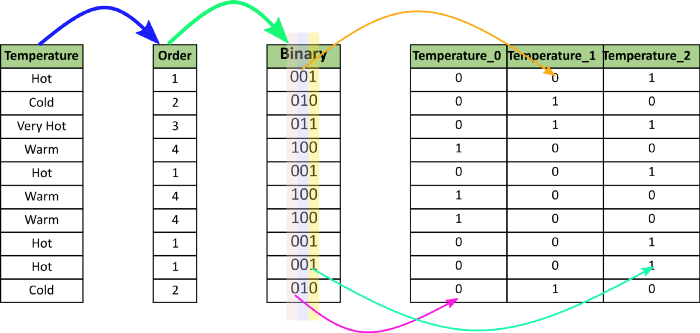


Источник: towardsdatascience.com

1Сначала признак кодируется в числовое представление, как мы делали это при кодировании порядковых признаков: hot — 1, cold — 2, … и так далее.

2Затем каждое числовое представление, выраженное целым числом, переводится в двоичный код: 1 – 001, 2 – 010, 3 – 011,... и так далее.

3Затем для каждого двоичного представления создаются новые признаки. В нашем случае двоичное представления уместилось в три числа, поэтому итогом стало создание трёх новых признаков.

Пошаговый алгоритм двоичного кодирования можно описать так: 

- значения признака кодируются в некоторый числовой порядок;
- целые числа кодируются в двоичный код;
- цифры двоичного представления формируют новые столбцы.

import category_encoders as ce # импорт для работы с кодировщиком

bin_encoder = ce.BinaryEncoder(cols=['type']) # указываем столбец для кодирования

type_bin = bin_encoder.fit_transform(clothing['type'])

clothing = pd.concat([clothing, type_bin], axis=1)

clothing

Закодируем признак country двоичным способом.

In [846]:
import category_encoders

encoder = ce.BinaryEncoder(cols=['country'])
country_col = encoder.fit_transform(wine_df['country'])
wine_df=pd.concat([wine_df, country_col], axis = 1)
wine_df.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,taster_name_Susan Kostrzewa,taster_name_Carrie Dykes,taster_name_Fiona Adams,taster_name_Christina Pickard,country_0,country_1,country_2,country_3,country_4,country_5
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,0,0,0,0,0,0,0,0,0,1
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,0,0,0,0,0,0,0,0,1,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,0,0,0,0,0,1,1


In [847]:
len(wine_df['taster_twitter_handle'].unique())

16

In [848]:
len(wine_df['country'].unique())

44

In [849]:
encoder = ce.BinaryEncoder(cols = ['taster_twitter_handle'])
taster_twitter = encoder.fit_transform(wine_df['taster_twitter_handle'])
wine_df= pd.concat([wine_df, taster_twitter], axis=1)

In [850]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129972 entries, 0 to 129970
Data columns (total 55 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unnamed: 0                      129972 non-null  int64         
 1   country                         129909 non-null  object        
 2   description                     129972 non-null  object        
 3   designation                     129972 non-null  object        
 4   points                          129972 non-null  int64         
 5   price                           129972 non-null  float64       
 6   province                        129909 non-null  object        
 7   region_1                        129972 non-null  object        
 8   taster_name                     129972 non-null  object        
 9   taster_twitter_handle           129972 non-null  object        
 10  title                           129972 non-null  object 

In [851]:
#Используйте следующий датафрейм для задания:

list_of_dicts = [
 {'product': 'Product1', 'price': 1200, 'payment_type': 'Mastercard'},
 {'product': 'Product2', 'price': 3600, 'payment_type': 'Visa'},
 {'product': 'Product3', 'price': 7500, 'payment_type': 'Amex'}
]
df = pd.DataFrame(list_of_dicts)
# Определите типы признаков и закодируйте их в соответствии с изученными способами.
df

,product,price,payment_type
0,Product1,1200,Mastercard
1,Product2,3600,Visa
2,Product3,7500,Amex


In [852]:
"""import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['product','payment_type'])
cols = encoder.fit_transform(df[['product','payment_type']])
df = pd.concat([df, cols], axis=1)"""

"import category_encoders as ce\n\nencoder = ce.OneHotEncoder(cols=['product','payment_type'])\ncols = encoder.fit_transform(df[['product','payment_type']])\ndf = pd.concat([df, cols], axis=1)"

In [853]:
import category_encoders

encoder = ce.OneHotEncoder(cols = ['product', 'payment_type'], use_cat_names=True)
cols = encoder.fit_transform(df[['product', 'payment_type']])
df = pd.concat([df, cols], axis = 1)
df

,product,price,payment_type,product_Product1,product_Product2,product_Product3,payment_type_Mastercard,payment_type_Visa,payment_type_Amex
0,Product1,1200,Mastercard,1,0,0,1,0,0
1,Product2,3600,Visa,0,1,0,0,1,0
2,Product3,7500,Amex,0,0,1,0,0,1


### Преобразование признаков. Нормализация. Стандартизация

НОРМАЛИЗАЦИЯ

Нормализация — один из методов преобразования входных признаков, при котором значения признаков приводятся к заданному диапазону, например [0,...,1]. 

Существует несколько способов нормализации: MinMaxScaler, RobustScaler.

In [854]:
import numpy as np 
import pandas as pd

np.random.seed(34)

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

# сгенерируем датасет из случайных чисел
df = pd.DataFrame({ 
    # Бета распределение, 5 – значение альфа, 1 – значение бета, 1000 – размер
    'beta': np.random.beta(5, 1, 1000) * 60,
    
    # Экспоненциальное распределение, 10 – "резкость" экспоненты, 1000 – размер
    'exponential': np.random.exponential(10, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 10 – стандартное отклонение, 1000 – количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df.columns)

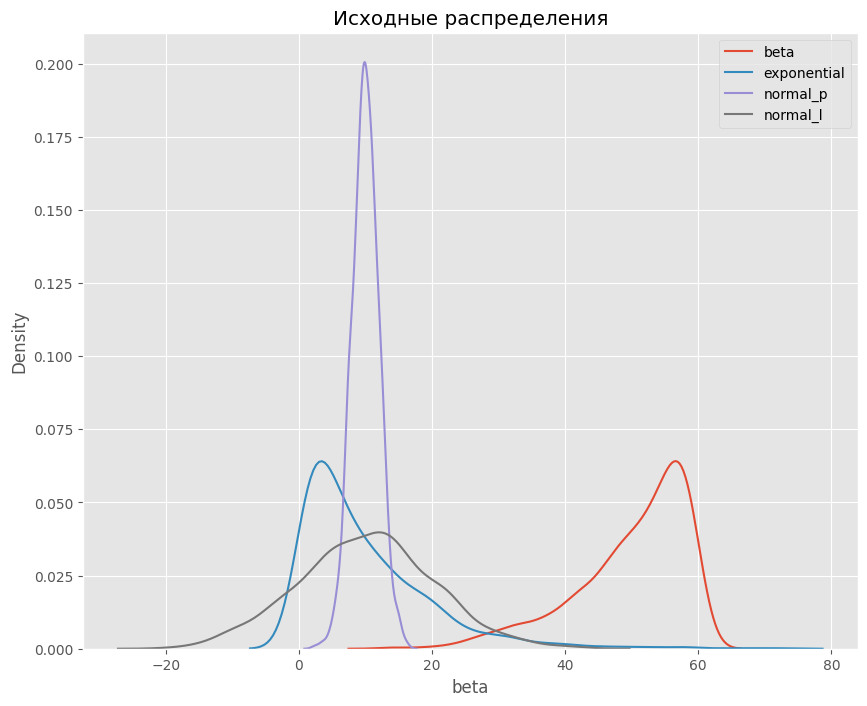

In [855]:
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df['beta'], ax=ax1, label ='beta')
sns.kdeplot(df['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df['normal_l'], ax=ax1, label ='normal_l')
plt.legend()

Сгенерированные распределения выбраны случайным образом, однако вы можете встретить их, например, в таких наборах данных:

- Бета-распределение моделирует вероятность. Например, коэффициент конверсии клиентов, купивших что-то на сайте.
- Экспоненциальное распределение, предсказывающее периоды времени между событиями. Например, время ожидания автобуса.
- Нормальное распределение, например распределение роста и веса человека.

Рассмотрим распределения на графике. Метод визуализации kdeplot() — это метод визуализации распределения наблюдений в наборе данных. Он представляет собой непрерывную линию плотности вероятности. Подробнее об этой функции вы можете прочитать в руководстве.

MINMAXSCALER

При применении нормализации методом MinMaxScaler все значения признаков будут преобразованы в диапазон [0,1], что означает, что минимальное и максимальное значение признака будет равно 0 и 1 соответственно.

Нормализация происходит следующим способом:

Из каждого значения признака х вычитается минимальное значение этого признака:  \(x-min\)
Результат вычитания делится на разность между максимумом и минимумом признака: \(max-min\)
\[x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}\]

Например, температура в горном посёлке за день может меняться от 10 до 35 градусов. Текущая температура составляет 17 градусов. 

Нормализуем это значение:

\[x_{scaled} = \frac{(17 – 10)}{(35-10)} = 0,28\]

Нормализованное значение 0.28 лежит в диапазоне от 0 до 1, и ближе к левой границе распределения (0), что соответствует также ненормализованному распределению (значение 17 ближе к 10).

Проведём нормализацию распределений признаков из обучающего примера.

Класс MinMaxScaler делает вышеописанную нормализацию автоматически при помощи функции преобразования fit_transform. Вы познакомитесь с ней подробнее в модулях машинного обучения.

<AxesSubplot: title={'center': 'После нормализации MinMaxScaler'}, xlabel='beta', ylabel='Density'>

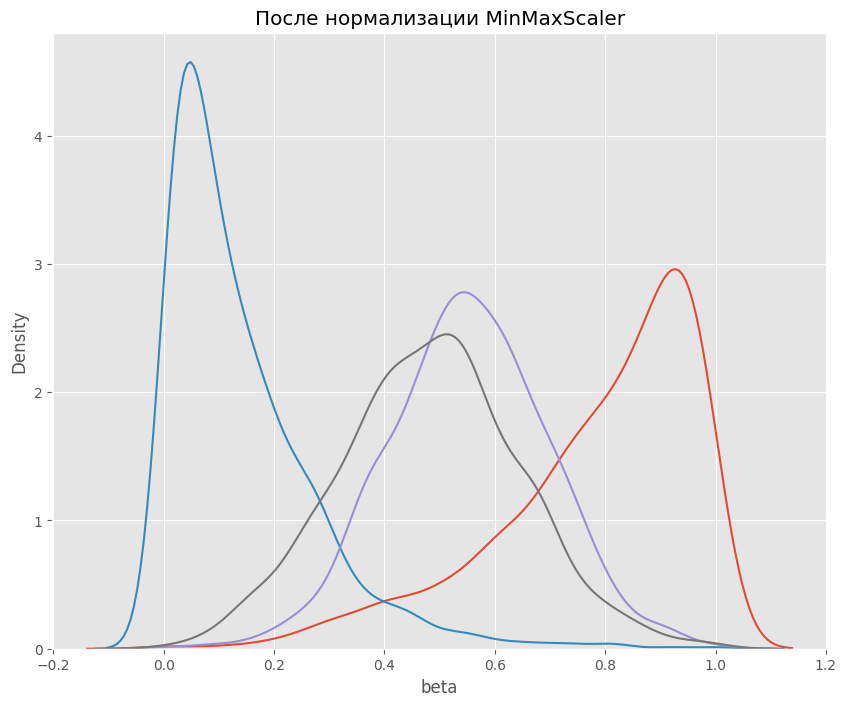

In [856]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# кодируем исходный датасет
df_mm = mm_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1)

ROBUSTSCALER

Нормализация методом RobustScaler происходит в несколько этапов:

из каждого значения признака вычитается медиана признака: \(x - медиана\)
полученное значение делится на межквартильный размах: \(значение\ 75\% — значение\ 25\%\)
\[x_{scaled} = \frac{(x - x_{median})}{IQR}\]

Например, имеется числовой ряд [1, 2, 3, 4, 5]. Медиана ряда — 3. Межквартильный размах: \(4 - 2 = 2\). Мы хотим нормализовать число 4.

\[x_{scaled} = \frac{(4 – 3)}{2} = 0.5\]

Таким образом, значение 4 после нормализации приняло значение 0.5.

Проведём нормализацию распределений признаков из обучающего примера, используя класс RobustScaler.

<AxesSubplot: title={'center': 'Распределения после RobustScaler'}, xlabel='beta', ylabel='Density'>

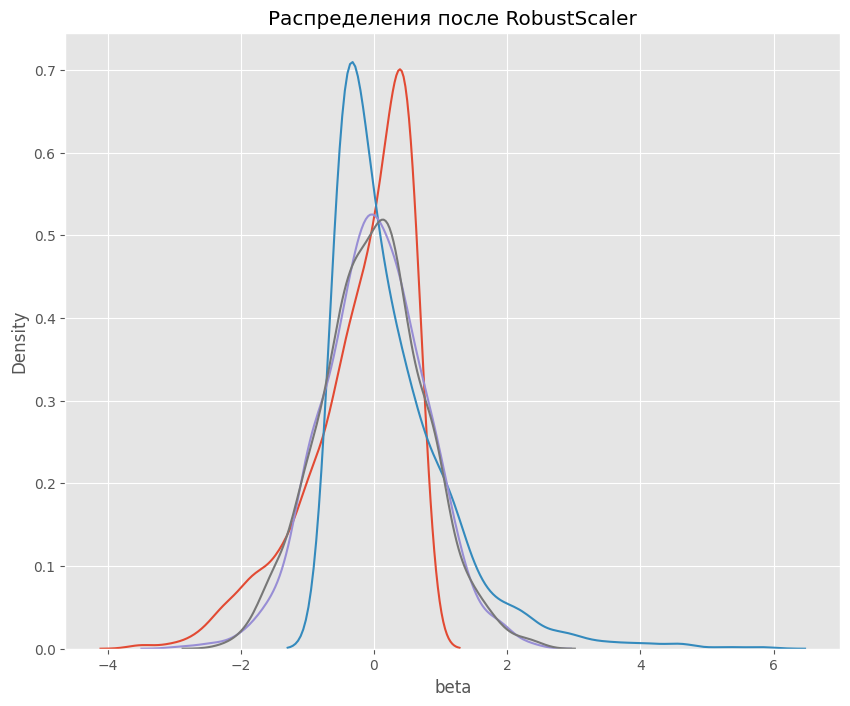

In [857]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
df_r = r_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1)
sns.kdeplot(df_r['exponential'], ax=ax1)
sns.kdeplot(df_r['normal_p'], ax=ax1)
sns.kdeplot(df_r['normal_l'], ax=ax1)

СТАНДАРТИЗАЦИЯ 

Стандартизация — ещё один метод преобразования входных признаков, при котором изменяется распределение таким образом, чтобы среднее значений равнялось 0, а стандартное отклонение — 1. 

\[X_{scaled} = \frac{(x — x_{mean})}{x_{std}},\]

где \(x_{std}\) — стандартное отклонение.

Например, у нас есть числовой ряд [1, 2, 3, 4, 5]. Среднее ряда: 3. Стандартное отклонение — 1.4. Нормализуем число 4.

\[x_{scaled} = \frac{(4 – 3)}{1.4} = 0.7\]

Нормализованное число 4 равно 0.7.

Этот процесс можно описать как центрирование данных с масштабированием. Сначала происходит вычитание среднего значения из всех данных — центрирование,  а затем деление на отклонение. 

ДЛЯ ЧЕГО НЕОБХОДИМО ТАКОЕ ПРЕОБРАЗОВАНИЕ?

Как и нормализация, стандартизация может быть полезна при данных с разными масштабами. Однако в отличие от нормализации стандартизация предполагает, что признак распределён нормально.

Чтобы понять, как стандартизация меняет распределение, рассмотрим метод стандартизации StandardScaler в Python.

Продолжим использовать обучающий пример, сгенерированный нами при изучении нормализации данных. Стандартизируем признаки в исходном наборе данных.

STANDARDSCALER

Для стандартизации используем класс StandardScaler.

<AxesSubplot: title={'center': 'Распределения после StandardScaler'}, xlabel='beta', ylabel='Density'>

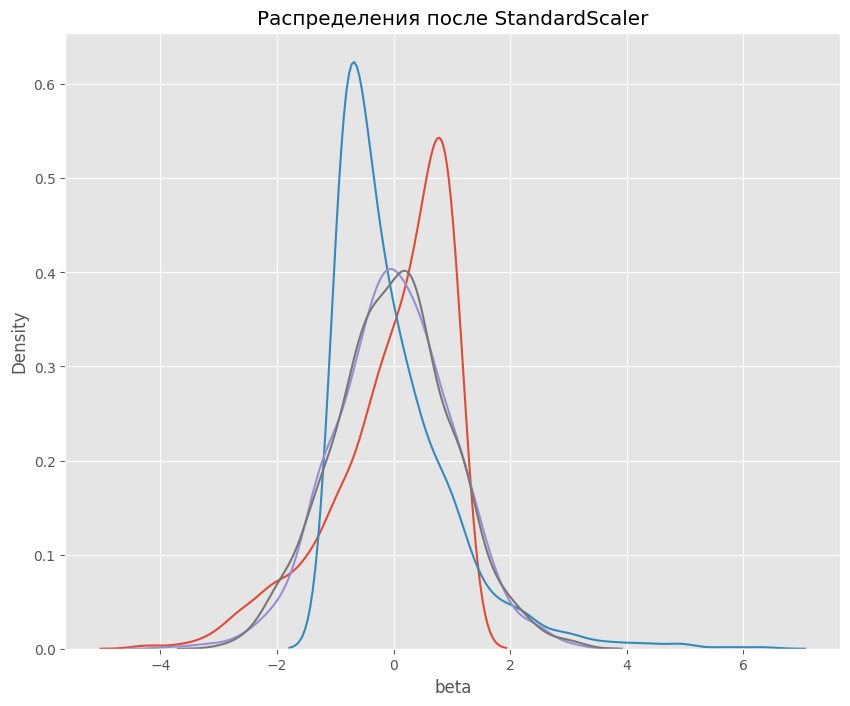

In [858]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# кодируем исходный датасет
df_s = s_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1)
sns.kdeplot(df_s['exponential'], ax=ax1)
sns.kdeplot(df_s['normal_p'], ax=ax1)
sns.kdeplot(df_s['normal_l'], ax=ax1)

Нормализуем признак price. Выберите подходящий тип нормализации, учитывая тот факт, что в данных присутствуют вина с выбросной стоимостью.

In [859]:
# создадим копию датафрейма чтоб при преобразовании не повредить исходный да фрейм
copy_wine = wine_df.copy()
# создадим дополнительный пустой столбец, для работы метода масштабирования, т.к с одним столбцом в параметрах выскакивает ошибка при работе кода
copy_wine['empty'] = 0
priceCol = list(copy_wine[['empty', 'price']].columns)
priceCol

['empty', 'price']

In [860]:
r_scaler = preprocessing.RobustScaler()
# кодируем исходный датасет
r_price = r_scaler.fit_transform(copy_wine[['empty', 'price']])
r_price = pd.DataFrame(r_price, columns=priceCol)
copy_wine['price'] = r_price['price']
copy_wine['price'].sum().round()


43501.0

Стандартизируем исходный признак price.

In [861]:
s_scaler = preprocessing.StandardScaler()
# кодируем исходный код
s_price = s_scaler.fit_transform(copy_wine[['empty', 'price']])
s_price = pd.DataFrame(s_price, columns=priceCol)
copy_wine['price'] = s_price['price']



In [862]:
copy_wine['price'][129960:].round(2)

129959   -0.46
129960   -0.01
129961    0.55
129962    0.32
129963   -0.14
129964    0.12
129965   -0.39
129966    0.00
129967   -0.19
129968   -0.19
129969    1.00
129970   -0.14
Name: price, dtype: float64

### Отбор признаков. Мультиколлинеарность

Отбор признаков — процесс выбора важных признаков, наиболее влияющих на предсказание.

C:\Users\Maksym\AppData\Local\Temp\ipykernel_36616\3386712709.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(copy_wine.corr())


<AxesSubplot: >

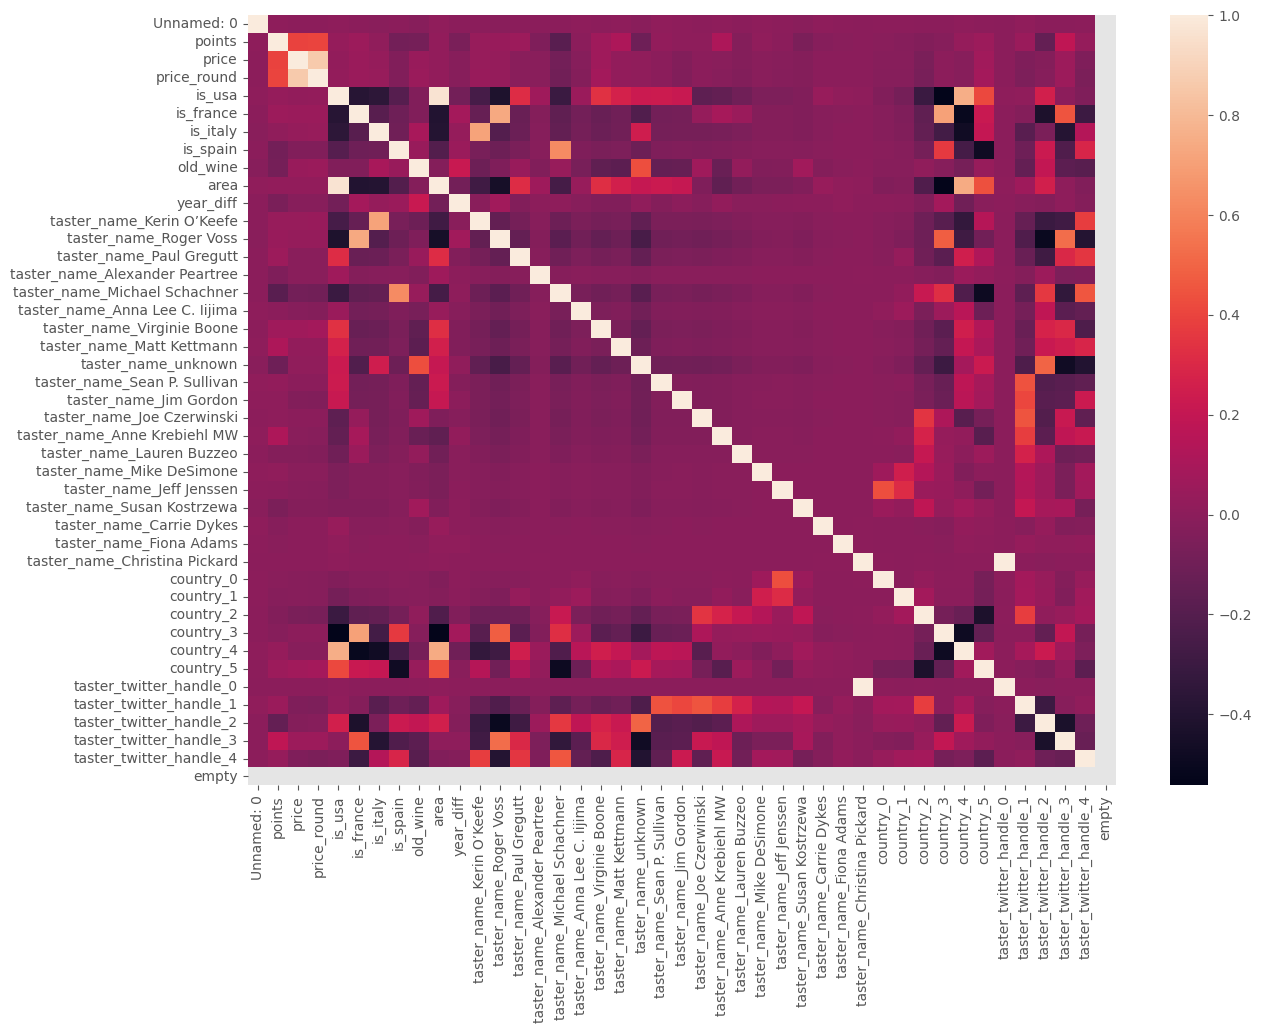

In [863]:
# построим тепловую карту кореляции признаков
import seaborn as sns
import matplotlib.pyplot as plt

axis= plt.subplots(ncols=1, figsize=(14, 10))

sns.heatmap(copy_wine.corr())

In [864]:
copy_wine.corr(method='pearson')

C:\Users\Maksym\AppData\Local\Temp\ipykernel_36616\2337138007.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  copy_wine.corr(method='pearson')


,Unnamed: 0,points,price,price_round,is_usa,is_france,is_italy,is_spain,old_wine,area,...,country_2,country_3,country_4,country_5,taster_twitter_handle_0,taster_twitter_handle_1,taster_twitter_handle_2,taster_twitter_handle_3,taster_twitter_handle_4,empty
Unnamed: 0,1.000000,0.007125,0.004646,0.004662,0.010928,-0.002187,-0.010178,-0.000432,-0.015320,0.011775,...,-0.001231,-0.001589,0.010799,0.001554,-0.001707,0.012235,-0.001283,-0.000425,0.003705,NaN
points,0.007125,1.000000,0.395527,0.402064,0.032592,0.059248,0.015926,-0.088491,-0.079012,0.023427,...,-0.035258,-0.019867,0.032218,0.059086,-0.001372,0.050516,-0.140644,0.183248,0.030899,NaN
price,0.004646,0.395527,1.000000,0.865411,0.023708,0.048275,0.034791,-0.040249,0.046497,0.020094,...,-0.061495,0.000992,-0.012864,0.077108,-0.001035,-0.043678,-0.024759,0.055959,-0.047740,NaN
price_round,0.004662,0.402064,0.865411,1.000000,0.026379,0.052615,0.039314,-0.041345,0.053655,0.021984,...,-0.070115,0.002364,-0.016294,0.085657,-0.001031,-0.051023,-0.022453,0.057807,-0.056189,NaN
is_usa,0.010928,0.032592,0.023708,0.026379,1.000000,-0.384584,-0.357477,-0.197266,-0.037337,0.966549,...,-0.302513,-0.542764,0.758877,0.412017,0.005700,0.012343,0.256748,0.000427,-0.042812,NaN
is_france,-0.002187,0.059248,0.048275,0.052615,-0.384584,1.000000,-0.190359,-0.105045,-0.041971,-0.398449,...,-0.161090,0.708566,-0.506781,0.219402,-0.003075,-0.030377,-0.424677,0.446008,-0.300874,NaN
is_italy,-0.010178,0.015926,0.034791,0.039314,-0.357477,-0.190359,1.000000,-0.097641,0.098039,-0.393994,...,-0.149736,-0.268654,-0.471060,0.203938,-0.002858,-0.184386,-0.059161,-0.386531,0.142941,NaN
is_spain,-0.000432,-0.088491,-0.040249,-0.041345,-0.197266,-0.105045,-0.097641,1.000000,0.045329,-0.206603,...,-0.082628,0.363446,-0.259944,-0.478780,-0.001577,-0.104386,0.227586,-0.217472,0.285670,NaN
old_wine,-0.015320,-0.079012,0.046497,0.053655,-0.037337,-0.041971,0.098039,0.045329,1.000000,-0.025371,...,0.012249,-0.020869,-0.075706,0.038530,0.003175,-0.143429,0.192703,-0.173757,-0.190635,NaN
area,0.011775,0.023427,0.020094,0.021984,0.966549,-0.398449,-0.393994,-0.206603,-0.025371,1.000000,...,-0.220454,-0.534240,0.742531,0.434768,0.007288,0.063930,0.255088,0.011283,-0.042326,NaN


 По тепловуй матрице корреляций для всех признаков. Найдем самые сильно скоррелированные пары. Удалим из этих пар по одному признаку.

In [865]:
copy_wine=copy_wine.drop(columns=['is_usa', 'is_france', 'is_italy', 'is_spain', 'taster_twitter_handle_0', 'price', 'area'], axis=1)

C:\Users\Maksym\AppData\Local\Temp\ipykernel_36616\3136798832.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(copy_wine.corr(), ax=axis_2)


<AxesSubplot: >

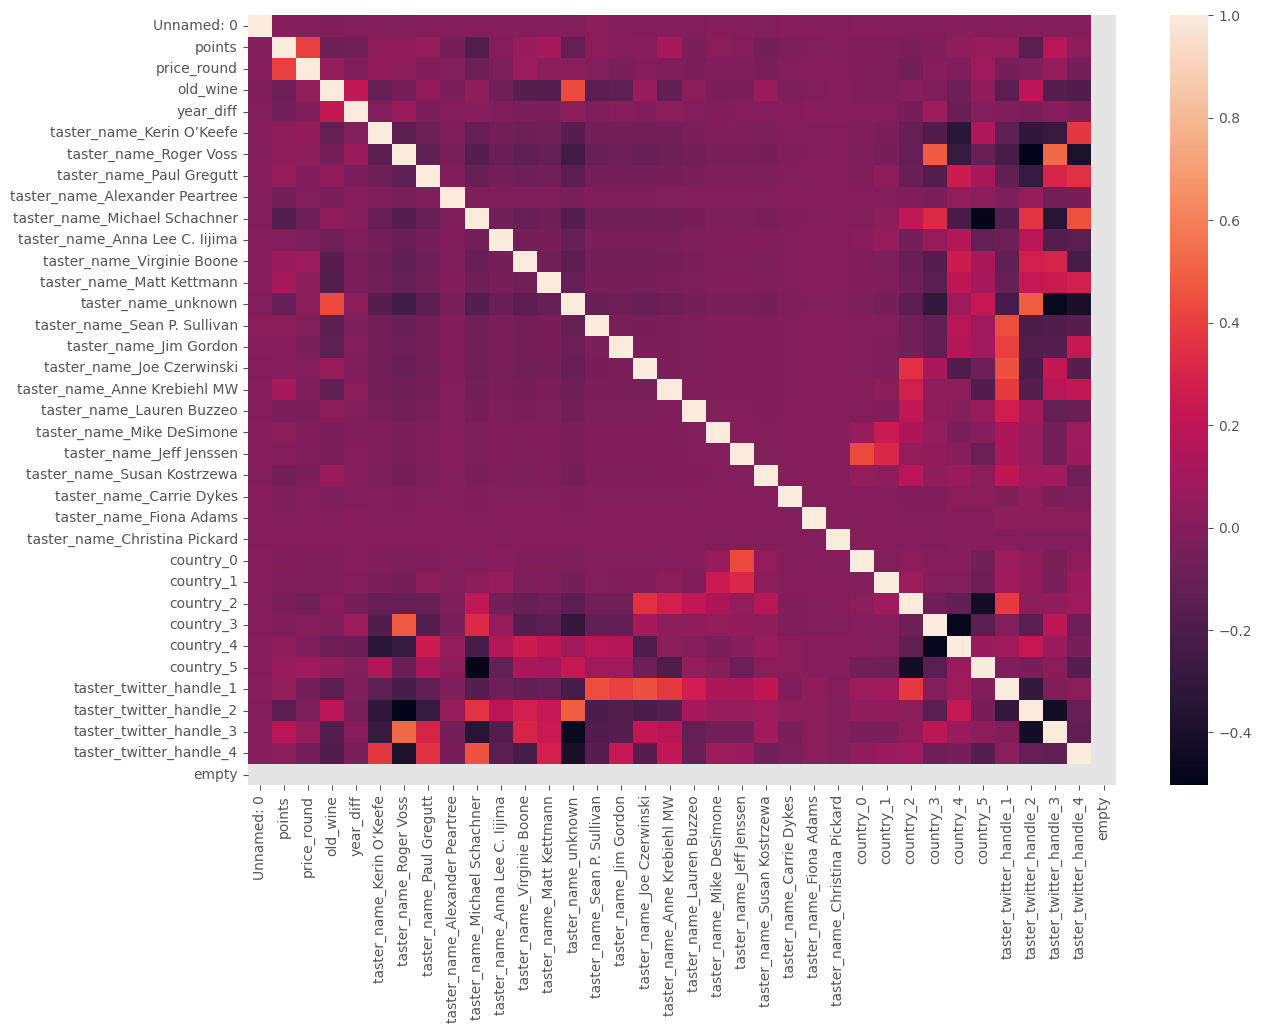

In [867]:
fig, axis_2= plt.subplots(ncols=1, figsize=(14, 10))
sns.heatmap(copy_wine.corr(), ax=axis_2)

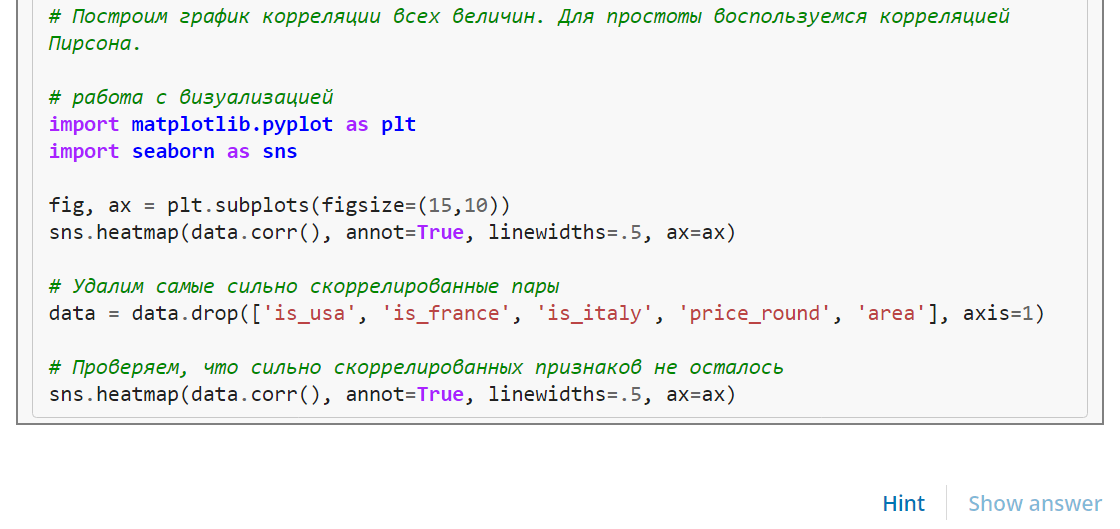